In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Sujithkumar/Desktop/Cognifyz/Dataset .csv")

df[['Cuisines', 'Aggregate rating', 'Votes']].head()

,Cuisines,Aggregate rating,Votes
0,"French, Japanese, Desserts",4.8,314
1,Japanese,4.5,591
2,"Seafood, Asian, Filipino, Indian",4.4,270
3,"Japanese, Sushi",4.9,365
4,"Japanese, Korean",4.8,229


In [2]:
df['Primary Cuisine'] = df['Cuisines'].astype(str).apply(lambda x: x.split(',')[0].strip())

C:\Users\Sujithkumar\AppData\Local\Temp\ipykernel_4556\798804201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.head(10).index, y=avg_rating.head(10).values, palette='viridis')


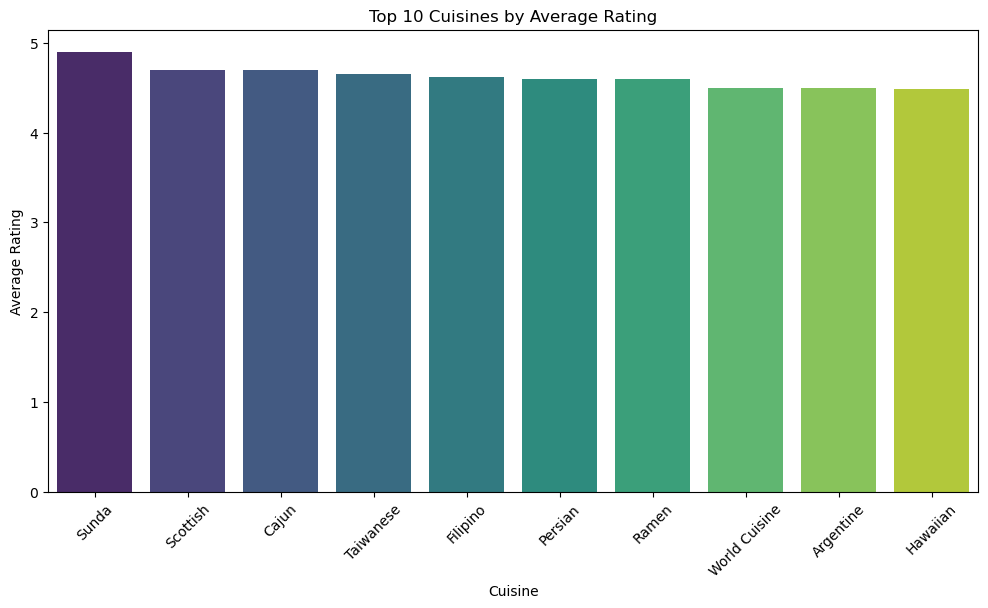

In [3]:
avg_rating = df.groupby('Primary Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating.head(10).index, y=avg_rating.head(10).values, palette='viridis')
plt.title("Top 10 Cuisines by Average Rating")
plt.ylabel("Average Rating")
plt.xlabel("Cuisine")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sujithkumar\AppData\Local\Temp\ipykernel_4556\1173145200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_cuisines.head(10).index, y=popular_cuisines.head(10).values, palette='magma')


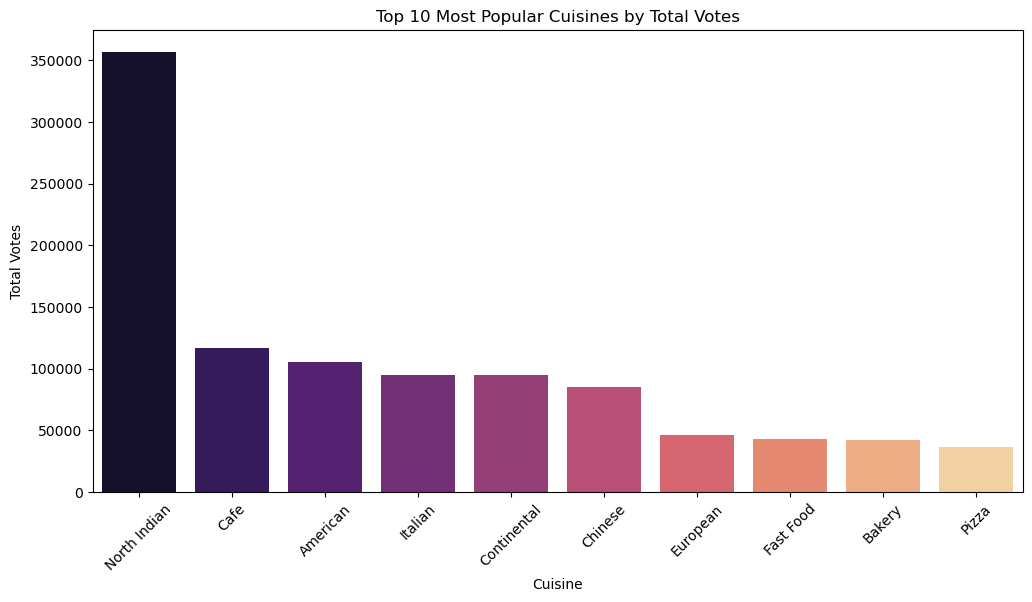

In [4]:
popular_cuisines = df.groupby('Primary Cuisine')['Votes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=popular_cuisines.head(10).index, y=popular_cuisines.head(10).values, palette='magma')
plt.title("Top 10 Most Popular Cuisines by Total Votes")
plt.ylabel("Total Votes")
plt.xlabel("Cuisine")
plt.xticks(rotation=45)
plt.show()

In [5]:
cuisine_votes = df.groupby('Primary Cuisine').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).query('Votes >= 50').sort_values(by='Aggregate rating', ascending=False)

print("Top cuisines by rating (with at least 50 votes):")
print(cuisine_votes.head(10))

Top cuisines by rating (with at least 50 votes):
                 Aggregate rating  Votes
Primary Cuisine                         
Sunda                    4.900000   5514
Cajun                    4.700000   1412
Scottish                 4.700000    163
Taiwanese                4.650000    384
Filipino                 4.616667   2727
Persian                  4.600000    177
Ramen                    4.600000    418
World Cuisine            4.500000   1244
Argentine                4.500000    602
Hawaiian                 4.480000   5749
